### Clustering

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
movies = pd.read_csv('../data/highest-grossing-hollywood-movies/highest-grossing-hollywood-movies.csv')
movies = movies.drop('Rank', 1)
movies.head()

/tmp/ipykernel_9705/3729985611.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movies = movies.drop('Rank', 1)


Title  \
0  Star Wars: Episode VII - The Force Awakens (2015)   
1                           Avengers: Endgame (2019)   
2                                      Avatar (2009)   
3                               Black Panther (2018)   
4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Disney Studios Motion Pictures                NaN   
4  Walt Disney Studios Motion Pictures                NaN   

   Domestic Sales (in $)  International Sales (in $)  World Sales (in $)  \
0              936662225                  1132859475          2069521700   
1              858373000                  1939128328          2797501328   
2              760507625                  2086738578          2847246203   
3              700426566                   647171407          1347597973   
4              678815482                  1369544272          2048359754   

                                          Genre Movie Runtime License  
0             ['Action', 'Adventure', 'Sci-Fi']   2 hr 18 min   PG-13  
1    ['Action', 'Adventure', 'Drama', 'Sci-Fi']    3 hr 1 min   PG-13  
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   2 hr 42 min   PG-13  
3             ['Action', 'Adventure', 'Sci-Fi']   2 hr 14 min     NaN  
4             ['Action', 'Adventure', 'Sci-Fi']   2 hr 29 min     NaN

In [3]:
movies = movies.dropna()

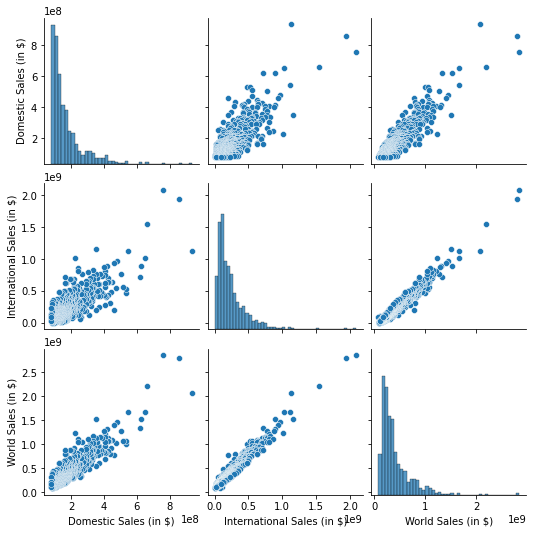

In [4]:
sns.pairplot(movies)

In [5]:
features = ['Domestic Sales (in $)', 'International Sales (in $)', 'World Sales (in $)']
km = KMeans(n_clusters=2, random_state=42).fit(movies[features])

In [6]:
movies['cluster'] = km.predict(movies[features])

In [7]:
movies.head()

Title  \
0  Star Wars: Episode VII - The Force Awakens (2015)   
1                           Avengers: Endgame (2019)   
2                                      Avatar (2009)   
6                                     Titanic (1997)   
7                              Jurassic World (2015)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
6  A seventeen-year-old aristocrat falls in love ...   
7  A new theme park, built on the original site o...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
6                   Paramount Pictures  December 19, 1997   
7                   Universal Pictures      June 10, 2015   

   Domestic Sales (in $)  International Sales (in $)  World Sales (in $)  \
0              936662225                  1132859475          2069521700   
1              858373000                  1939128328          2797501328   
2              760507625                  2086738578          2847246203   
6              659363944                  1542283320          2201647264   
7              652385625                  1018130819          1670516444   

                                          Genre Movie Runtime License  cluster  
0             ['Action', 'Adventure', 'Sci-Fi']   2 hr 18 min   PG-13        1  
1    ['Action', 'Adventure', 'Drama', 'Sci-Fi']    3 hr 1 min   PG-13        1  
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   2 hr 42 min   PG-13        1  
6                          ['Drama', 'Romance']   3 hr 14 min   PG-13        1  
7             ['Action', 'Adventure', 'Sci-Fi']    2 hr 4 min   PG-13        1

In [8]:
movies.cluster.value_counts()

0    609
1    135
Name: cluster, dtype: int64

#### What are our clusters?

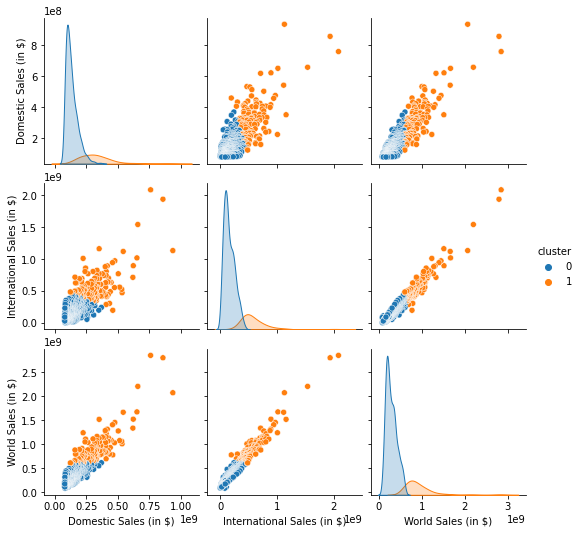

In [9]:
sns.pairplot(movies, hue="cluster")

### Evaluating the model

In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [11]:
metrics.silhouette_score(movies[features], km.labels_, metric='euclidean')

0.6828849859857178

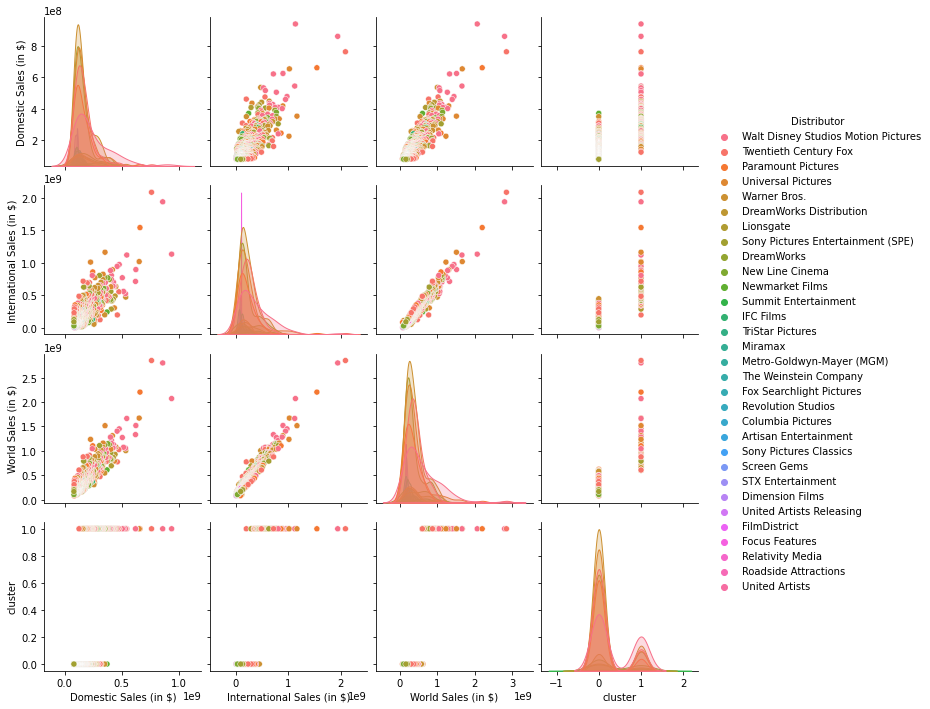

In [12]:
sns.pairplot(movies, hue='Distributor')

In [13]:
contingency_table = movies.groupby(['Distributor', 'cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster                                0   1
Distributor                                 
Artisan Entertainment                  1   0
Columbia Pictures                      3   0
Dimension Films                        7   0
DreamWorks                            10   9
DreamWorks Distribution               14   1
FilmDistrict                           2   0
Focus Features                         2   0
Fox Searchlight Pictures               3   0
IFC Films                              1   0
Lionsgate                             11   5
Metro-Goldwyn-Mayer (MGM)              5   0
Miramax                                8   0
New Line Cinema                       14   3
Newmarket Films                        1   0
Paramount Pictures                    68   9
Relativity Media                       1   0
Revolution Studios                     8   0
Roadside Attractions                   1   0
STX Entertainment                      3   0
Screen Gems                            3   0
Sony Pictures Classics                 1   0
Sony Pictures Entertainment (SPE)     80  16
Summit Entertainment                   2   3
The Weinstein Company                  5   0
TriStar Pictures                       8   0
Twentieth Century Fox                 85  18
United Artists                         1   0
United Artists Releasing               1   0
Universal Pictures                    92  15
Walt Disney Studios Motion Pictures   61  37
Warner Bros.                         107  19

sometimes there is overlap between the clusters, which means that their characteristics were similar to those of other distributors.